<a href="https://colab.research.google.com/github/r-u-5k/study-dev/blob/master/bigdata/ch4_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업형2 문제 – 아울렛 판매 금액 예측

제공된 데이터는 10개 아울렛 매장에서 1,500여 개 제품의 판매 데이터를 수집한 것이다.  
학습용 데이터(`train.csv`)를 기반으로 제품의 **판매 금액(Item_Outlet_Sales)**을 예측하는 모델을 개발하고,  
개발한 모델을 평가용 데이터(`test.csv`)에 적용하여 예측 결과를 다음 제출 형식에 따라 `result.csv` 파일로 생성하시오.

- **평가 지표:** RMSE (Root Mean Squared Error)  
- **예측 대상:** `Item_Outlet_Sales`  
- **제출 파일:** 예측값만 포함, 컬럼명은 `pred`로 지정

* 성능이 우수한 예측 모델을 구축하기 위해서는 데이터 정제, Feature Engineering, 하이퍼 파라미터(hyper parameter) 최적화, 모델 비교 등이 필요할 수 있음. 다만, 과적합에 유의하여야 함.
---

## 📄 제출 형식

- **파일명:** `result.csv` (디렉토리/폴더 지정 금지)  
- **제출 컬럼:** `pred` 1개  
- **예측 개수:** 평가용 데이터(`test.csv`)의 행 수(1,705개)와 일치해야 함

### ✅ 제출 예시 (result.csv)

~~~
pred
1200
800
1700
1600
...
~~~


# 1.문제정의
- 주어진 상품 데이터로부터 판매 금액을 예측
    - 레이블(타깃)은 판매 금액 (컬럼명: `Item_Outlet_Sales`)  
- 예측한 판매 금액을 CSV 파일로 생성하여 제출
- 평가 기준은 **RMSE (Root Mean Squared Error)**
- 제출 파일은 예측값만 포함된 `result.csv`로 생성  (컬럼명: `pred`, 1개)

---

# 2. 라이브러리 및 데이터 불러오기

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
train = pd.read_csv('https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p2/ch4/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p2/ch4/test.csv')

# 3. 탐색적 데이터 분석(EDA)

In [ ]:
# 데이터 크기
train.shape, test.shape

((6818, 12), (1705, 11))

In [ ]:
# 데이터 샘플
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


In [ ]:
# 자료형 (타입)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [ ]:
# 수치형 컬럼 통계값 확인(train)
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

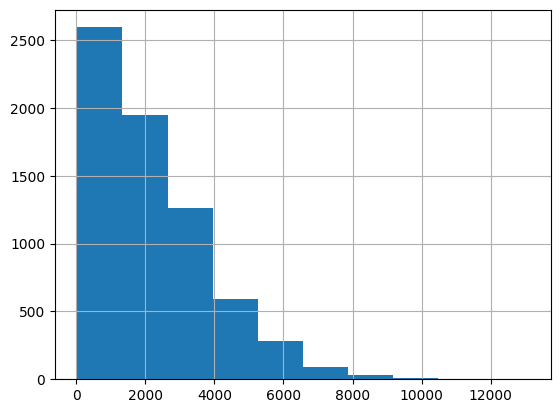

In [ ]:
# 타겟 시각화 (시험환경에서는 사용 불가)
train['Item_Outlet_Sales'].hist()

In [ ]:
# 범주형 컬럼 통계값 확인 (train)
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDO19,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [ ]:
# 범주형 컬럼 통계값 확인 (test)
test.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,1705,1705,1705,1705,1235,1705,1705
unique,1077,5,16,10,3,3,4
top,DRD15,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,4,997,272,207,565,686,1103


In [ ]:
# train과 test 유니크(종류) 비교 / true 같다 / false 다르다
set(train['Item_Identifier']) == set(test['Item_Identifier'])

False

In [ ]:
# 결측치 (train)
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1162
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1940
Outlet_Location_Type,0


In [ ]:
# 결측치 (test)
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,301
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,470
Outlet_Location_Type,0


# 4. 데이터 전처리

### 타겟 분리

In [ ]:
# 타겟 분리 (가장 먼저 하는 것을 추천함)
target = train.pop('Item_Outlet_Sales')

### 결측치 처리

In [ ]:
# 결측치 처리
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(train['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

### 인코딩

In [ ]:
# 범주형 데이터 선택 방법1
list(train.columns[train.dtypes == object])

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# 범주형 데이터 선택 방법2
cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# 인코딩을 위해 train + test
print(train.shape, test.shape)
df = pd.concat([train, test])
print(df.shape)

(6818, 11) (1705, 11)
(8523, 11)


In [ ]:
# 레이블 인코딩 vs 원핫 인코딩 중 선택
# 1. 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

# 2. 원핫 인코딩
# df = df.drop('Item_Identifier', axis=1)
# df = pd.get_dummies(df)

원핫 인코딩
- 만약 원핫인코딩을 할 것이라면 'Item_Identifier'는 삭제(drop) 후 진행 추천
- 유니크(종류) 수가 1000개가 넘음 -> 원핫인코딩은 1000개 이상의 컬럼을 생성함
- 'Item_Identifier'삭제해도 큰 차이 없을 것으로 예상 됨 (비교 필요)
- 삭제한다면 인코딩 전 삭제 필요

In [ ]:
# 변경된 데이터 (샘플 확인)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1467,12.500,1,0.006760,9,42.8112,1,1987,0,2,1
1,1075,12.600,1,0.048741,1,60.4194,1,1987,0,2,1
2,450,12.800,1,0.075997,6,97.1410,1,1987,0,2,1
3,613,6.635,2,0.046351,5,37.4506,2,2007,1,1,1
4,695,13.500,2,0.125170,13,261.4910,1,1987,0,2,1


In [ ]:
# train, test데이터 분리
train = df.iloc[:len(train)].copy()
test = df.iloc[len(train):].copy()
train.shape, test.shape

((6818, 11), (1705, 11))

# 5. 검증 데이터 분할

In [ ]:
# 검증 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5454, 11), (1364, 11), (5454,), (1364,))

# 6. 머신러닝 학습 및 평가

In [ ]:
from sklearn.metrics import root_mean_squared_error

# 추가 학습
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

result = root_mean_squared_error(y_val, y_pred)
print('RMSE:', result)

# 추가 평가지표 학습
result = mean_squared_error(y_val, y_pred)
print('MSE:', result)

result = mean_absolute_error(y_val, y_pred)
print('MAE:', result)

result = r2_score(y_val, y_pred)
print('R2:', result)
# 베이스라인 RMSE: 1122.079060613472

RMSE: 1122.079060613472
MSE: 1259061.4182672116
MAE: 859.3467055461949
R2: 0.5150083712707461


In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)


result = root_mean_squared_error(y_val, y_pred)
print('RMSE:', result)

# 추가 평가지표 학습
result = mean_squared_error(y_val, y_pred)
print('MSE:', result)

result = mean_absolute_error(y_val, y_pred)
print('MAE:', result)

result = r2_score(y_val, y_pred)
print('R2:', result)

# 베이스라인 RMSE: 1055.191554504419

RMSE: 1055.191554504419
MSE: 1113429.2166974524
MAE: 747.408697281525
R2: 0.571106030693866


In [ ]:
# LightGBM
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=0, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

result = root_mean_squared_error(y_val, y_pred)
print('RMSE:', result)

# 추가 평가지표 학습
result = mean_squared_error(y_val, y_pred)
print('MSE:', result)

result = mean_absolute_error(y_val, y_pred)
print('MAE:', result)

result = r2_score(y_val, y_pred)
print('R2:', result)

# 베이스라인 RMSE: 1054.0180490596224

RMSE: 1054.0180490596224
MSE: 1110954.0477434527
MAE: 733.5583611556274
R2: 0.5720594680758426


# 7. 예측 및 결과 파일 생성

In [ ]:
pred = model.predict(test)
pred

array([1177.34874963,  817.45025287, 1773.57516246, ..., 3273.17763813,
        969.53934619, 1345.29474091])

In [ ]:
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

In [ ]:
pd.read_csv("result.csv")

,pred
0,1177.348750
1,817.450253
2,1773.575162
3,1511.599267
4,2633.560825
...,...
1700,403.703299
1701,655.047693
1702,3273.177638
1703,969.539346
